In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
file = pd.read_csv('../data/combined_data.csv')
print(file.head())

# ensure 'text' column is treated as a list of strings
#file['text'] = file['text'].astype(str).tolist()

# splitting into a training(80%) and testing(20%) set

X = file['text']    # all email texts
y = file['label']   # spam label

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state=1)

# train set:[X_train, y_train]
# validation set: [X_val, y_val]

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [10]:
# Using TfidfVectorizer to get features
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train) # learning parameters
X_val_features = feature_extraction.transform(X_val)         # applying knowledge

#print(f"Vocabulary: {feature_extraction.get_feature_names_out()}")
#print(f"Features: {X_train_features}")

# Creating a model
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [11]:
joblib.dump(feature_extraction, '../models/LRvectorizer.pkl')

['../models/LRvectorizer.pkl']

In [5]:
# Predictions
prediction_on_train_data = model.predict(X_train_features)
accuracy_ontrain = accuracy_score(y_train, prediction_on_train_data)

print(accuracy_ontrain)

prediction_on_val_data = model.predict(X_val_features)
accuracy_onval = accuracy_score(y_val, prediction_on_val_data)

print(accuracy_onval)

0.9897900488927236
0.9808743169398907


In [6]:

joblib.dump(model, '../models/LogisticRegression.pkl')

['../models/LogisticRegression.pkl']

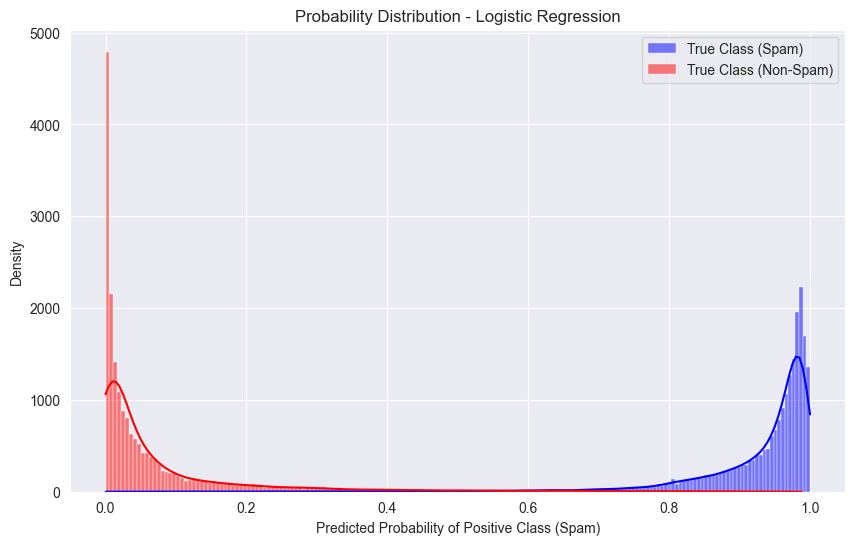

In [26]:
from plotting_util import plot_probability_distribution

# Assuming you have loaded your models and vectorized the test data as shown in the previous example
# Evaluate and plot probability distributions for each model

plot_probability_distribution(model, X_val_features, y_val, "Logistic Regression")
